# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt

def finite_difference(F, x_0, h, alpha, beta):
    derivative_approximation = (1 / h) * np.sum(alpha * F(x_0 + h * beta))
    return derivative_approximation

# === Verification code ===

# Test function sin(x) and derivative
def test_function(x):
    return np.sin(x)

def true_derivative(x):
    return np.cos(x)



# Set parameters
x0 = 0
h = 1e-5
exact = true_derivative(x0)

#Forwards test
alpha_forward = np.array([-1.0, 1.0]) 
beta_forward = np.array([0.0, 1.0])     
approx_forward = finite_difference(test_function, x0, h, alpha_forward, beta_forward)
print(f"Forward distance test error: {abs(approx_forward - exact)}")


# Backwards test:
alpha_backward = np.array([1, -1])
beta_backward = np.array([0, -1])
approx_backward = finite_difference(test_function, x0, h, alpha_backward, beta_backward)
print(f"Backwards distance test error: {abs(approx_backward - exact)}")


Forward distance test error: 1.6666779067975313e-11
Backwards distance test error: 1.6666779067975313e-11


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

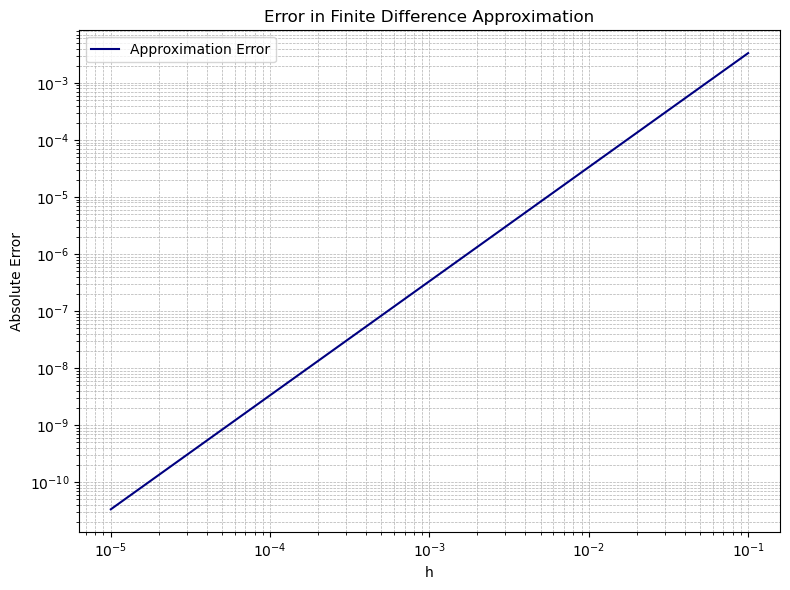

In [ ]:
import numpy as np
import math
# Define M and A
M = (1 / 15) * np.array([[4, 2, -1],
                         [2, 16, 2],
                         [-1, 2, 4]])

A = (1 / 6) * np.array([[-3, 4, -1],
                        [-4, 0, 4],
                        [1, -4, 3]])

# Compute alpha
v = np.array([0, 0, 1])
alpha = np.dot(np.dot(v, np.linalg.inv(M)), A)
beta = np.array([-2, -1, 0])  


x0 = 0
h_values = np.logspace(-1, -5, 100)
errors = []

for h in h_values:
    approx = finite_difference(test_function, x0, h, alpha, beta)
    exact = true_derivative(x0)
    error = np.abs(approx - exact)
    errors.append(error)

# Plot
plt.figure(figsize=(8, 6))
plt.loglog(h_values, errors, label='Approximation Error', color='navy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel("h")
plt.ylabel("Absolute Error")
plt.title("Error in Finite Difference Approximation")
plt.legend()
plt.tight_layout()
plt.show()


## Discussion


In this investigation it was decided to investigate the accuracy of the finite difference approximation upon the function sin(x), whose exact derivative is calculated as cos(x).  For 1.1, forwards and backwards tests were used to calculate the accuracy of our approximation for a sall h value around x0=0, which appeared to be very precise. Both tests lead to the same result, as one would expect given sin(x)’ symmetry about x=0. For 1.2, alpha and beta values were readjusted using the given matrices, M and A. A plot was then established to investigate how the accuracy of our function fluctuates, given increasing h values as an independent variable. H values were chosen between 1/(10^6) and 1/10, and plotted against the absolute error (difference between estimated and exact value for f’(x)). As can be quite clearly seen, a standard exponential relationship has between established between the two variables. As the value of h increases, the absolute error in our calculation becomes exponentially larger, suggesting that a small h value is critical for reaching a reliable and accurate value for f’(x), using our given approximation and alpha/beta values. It may be worth investigating whether this relationship holds for all functions f(x), or how altering alpha and beta values through alteration of matrices M and A would affect our plot.


## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [5]:

def gamma_n(n, x):

    if x == 0.0:
        return 1 / (math.factorial(n + 1))
    else:
        numerator = math.exp(x) - sum((x**k) / math.factorial(k) for k in range(n + 1))
        denominator = x ** (n + 1)
        y = numerator / denominator
        return y


**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [40]:
#Bisection method
def gamma_n_inverse(n, y, tol=1e-10, max_iter=100):
    a = 0.0
    b = 1.0 

    # Expand upper bound until gamma_n(b) > y
    while gamma_n(n, b) < y:
        b *= 2

    # Perform bisection
    for _ in range(max_iter):
        x = (a + b) / 2
        gamma_val = gamma_n(n, x)
        
        if abs(gamma_val - y) < tol:
            return x
        elif gamma_val < y:
            a = x
        else:
            b = x

    return x




## Discussion

For any given (n,y), we are looking to find an x such that  $\gamma_n ( x ) = y$. This sets up the function f(x) = $\gamma_n ( x ) - y$, which we must find a root for in order to establish $\gamma_n ( x ) -  y = 0$. There are several available methods at our disposal. For this task, it was decided that the bisection method would be used, as had been seen in workshop 8.   This is seen as a highly reliable method to use, as it is guaranteed to find a suitable answer. Other techniques, such as Newton’s method require the derivative of the function in order to function correctly, which would be hard to find given the complexity of the function at hand. The bisection method works by establishing an interval [a,b], where the function changes sign, implying that a root must lie within [a,b] via the Intermediate Value theorem.  In this particular case , we use a = 0 as our lower bound by definition, and begin with b=1 as an upper bound. If we find that $\gamma_n ( b)$ <y, we double the value of b until this is no longer the case. Once we have found suitable bounds for our equation, we proceed with the bisection method. The midpoint of a and b is found, and the function is performed upon the midpoint. If the returned x value is above or below what is desired, this value for x becomes the new upper/lower bound respectively. This continues until a suitable x value is found (a margin of error up to 10^(-10) is allowed).  If no such value has been discovered, we continue up until 100 iterations, after which the last estimate is used. This may take a while, and the bisection method does have the potential to be less efficient in comparison to other similar methods, however we move forward with it due to its reliability and ease of use.

## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

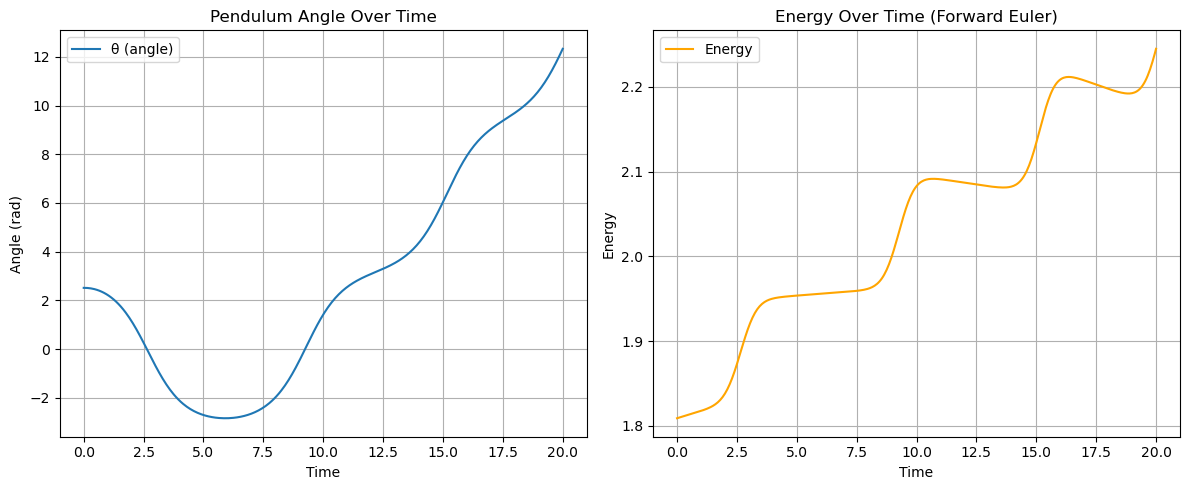

In [ ]:

h = 0.05                    # Time step size
T = 20                      # Final time
N = int(T / h)              # Number of time steps

u0 = np.zeros(N + 1)    
u1 = np.zeros(N + 1)   
energy = np.zeros(N + 1)    
time = np.linspace(0, T, N + 1)

# Initial condition
u0[0] = (4 / 5) * np.pi
u1[0] = 0

# Forward Euler time stepping
for n in range(N):
    u0[n + 1] = u0[n] + h * u1[n]
    u1[n + 1] = u1[n] - h * np.sin(u0[n])
    energy[n + 1] = 0.5 * u1[n + 1]**2 + 1 - np.cos(u0[n + 1])

# Final energy value
energy[0] = 0.5 * u1[0]**2 + 1 - np.cos(u0[0])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, theta, label='θ (angle)')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Angle Over Time')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, energy, label='Energy', color='orange')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Over Time (Forward Euler)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()




## Discussion

Plots were set up to investigate the effect of time on the pendulum's angle and overall energy generation over time. We applied the forward Euler method to the pendulum with initial angle of 4*pi/5, with h=0.05 and up to T=20. The formula used to calculate u0(n+1) and u1(n+1) were derived and used to calculate total energy. The first plot does not appear to show any kind of oscillating pattern in the pendulum's behaviour (unless an oscilation period lasts for over 20 seconds, very unlikely unless the pendulum is huge.) After reaching a minimum at roughly 6 seconds, the angle appears to rise steeply. The energy within the system does osciallte, however the overall trend is a linear rise. This appears to violate the law of conservation of energy, which states that enegy can not be created or destroyed, but only transferred from one source to another. As we assume that no external energy is being supplied to the pendulum, we are lead to beleive that this simulation violates the laws of physucs, and therefore would not be suitable.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

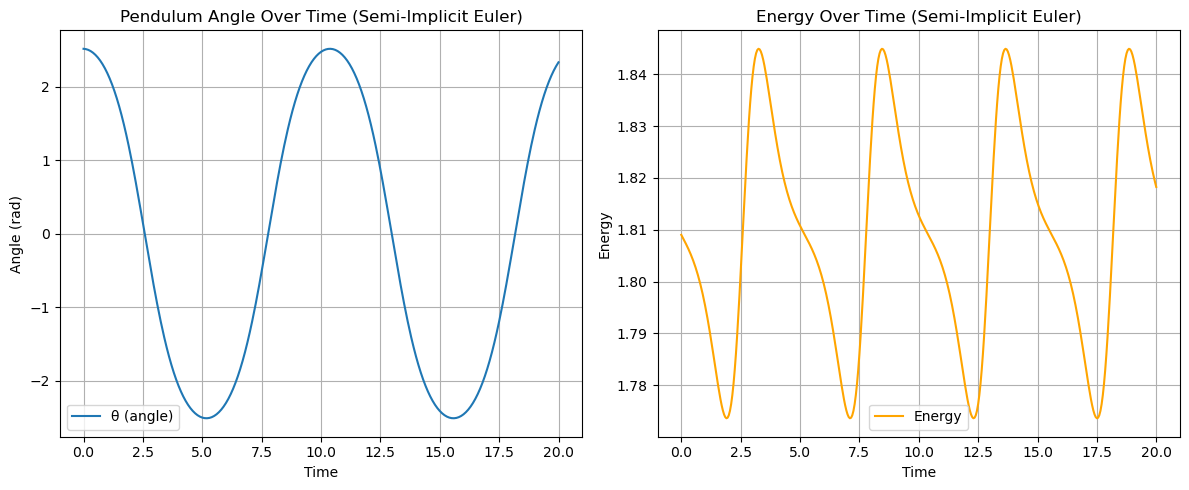

In [ ]:

#Update new semi-implicit formula 
for n in range(N):
    u1[n + 1] = u1[n] - h * np.sin(u0[n]) 
    u0[n + 1] = u0[n] + h * u1[n + 1]          
    energy[n + 1] = 0.5 * u1[n + 1]**2 + 1 - np.cos(u0[n + 1]) 
    
# Plotting angle and energy over time
plt.figure(figsize=(12, 5))


# Angle plot
plt.subplot(1, 2, 1)
plt.plot(time, u0, label='θ (angle)')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Angle Over Time (Semi-Implicit Euler)')
plt.grid(True)
plt.legend()

# Energy plot
plt.subplot(1, 2, 2)
plt.plot(time, energy, label='Energy', color='orange')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Over Time (Semi-Implicit Euler)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



## Discussion

Our new formula, derived using the semi-implicit Euler discretization, appears to show results that our more realistic. Both the pendulum's angle, and total energy are oscilatting in the graphs shows, which would be expected. There is also no rise in total energy, as we had encountered in the first test, which is useful. However, as the pendulum swings with no external force added, we would expect the total energy and maximum angle to decrease over time, as kinetic energy stored by the pendulum is lost through friction and air resistance. This should begin to take effect within our 20 second span, meaning that the simulation has perhaps not reached maximum efficiency. 

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

In [ ]:
#Backards Euler formula
#Inital guess
for n in range(N):
    u0_next = u0[n]
    u1_next = u1[n]

    for _ in range(20): 
        u0_next = u0[n] + h * u1_next
        u1_next = u1[n] - h * np.sin(u0_next)

    # Save updated values
    u0[n + 1] = u0_next
    u1[n + 1] = u1_next
    energy[n + 1] = 0.5 * u1_next**2 + 1 - np.cos(u0_next)


# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, u0, label='θ (angle)')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.title('Pendulum Angle (Backward Euler)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, energy, label='Energy', color='orange')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Over Time (Backward Euler)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()





## Discussion
The code for the backwards Euler method is slightly more comlicated, requiring a fixed point iteration in order to solve for u0 and u1. As the equations are coupled, we can not solve either individually, and so rely on initally guessing the value for u0(n+1) and u1(n+1), and then refining these answers. I have opted for 20 iterations in order to improve accuracy, although this may be slightly slow. The result is two graphs that appear to follow a trend we would expect to see in a pendulum's swing. The angle of swing begins quite large, but gradually begins to decrease over time. Meawhile the energy is oscilating, and decreasing in a linear trend. This would be expected due to the energy loss caused through friction and air resistance.

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

As previously discussed, the sign of a succesful model would be one that most closely resembles the enrgy transfer expected in a real life pendulum. As time progresses, we would expect the pendulum to slow as a result of friction, leading to a smaller swing, and therefore less kinetic energy stored within the system. As we can see, the third method appears to be much more effective in retaining these values throughout the given time period. It may be interesting to investigate the effect that changing time step or length of time would have upon our investigation, however the current trend appears to imply that the backwards method would be much more suitable when simulating a real life sitatuion under these conditions, and would most likely continue to outperform the other two if a longer time period were selected. 